# Part I: PyTorch MLP (See the detail analysis in report.pdf)

## 1.1 Task 1

Implement the MLP architecture and the training procedure by completing the files pytorch mlp.py and py-
torch train mlp.py.


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, n_inputs, n_hidden, n_classes):
        """
        Initializes multi-layer perceptron object.    
        Args:
            n_inputs: number of inputs (i.e., dimension of an input vector).
            n_hidden: list of integers, where each integer is the number of units in each linear layer
            n_classes: number of classes of the classification problem (i.e., output dimension of the network)
        """
        super(MLP, self).__init__()
        dims = [n_inputs] + n_hidden + [n_classes]
        layers = []
        for i in range(len(dims) - 1):
            linear = nn.Linear(dims[i], dims[i + 1])
            nn.init.xavier_uniform_(linear.weight)
            nn.init.zeros_(linear.bias)
            layers.append(linear)
            if i < len(dims) - 2:          
                layers.append(nn.ReLU(inplace=True))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        """
        Predict network output from input by passing it through several layers.
        Args:
            x: input to the network
        Returns:
            out: output of the network
        """
        return self.net(x)

## 1.2 Task 2

Train both your numpy version of MLP and the PyTorch version on the same data. To this end, I suggest you
to create a jupyter notebook file where you first create the training and set data using make moons (as you did in
Assignment 1), import the definition of the numpy and PyTorch MLP implementations, train them, and test them on
the same data. You should see similar accuracy rates with both implementations of the MLP architecture. You are
encouraged to test your MLPs with different datasets (see https://scikit-learn.org/stable/modules/classes.
html#samples-generator), plotting whenever possible for each chosen dataset the sampled points, highlighting
with different colours and shapes the different classes for both training and test set, and showing the accuracy
achieved with the numpy and PyTorch versions of the MLP architecture. It’s up to you if you want to use
stochastic gradient descent, batch gradient descent or mini-batch gradient descent: just make sure to train the two
models using the same strategy.

## dataset

Training set shape: (800, 2) (800,)
X_Train [[-0.05146968  0.44419863]
 [ 1.03201691 -0.41974116]
 [ 0.86789186 -0.25482711]
 [ 0.288851   -0.44866862]
 [-0.83343911  0.53505665]]
y_Train [1 1 1 1 0]


C:\Users\19767\AppData\Local\Temp\ipykernel_34392\4220662357.py:27: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
C:\Users\19767\AppData\Local\Temp\ipykernel_34392\4220662357.py:29: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],


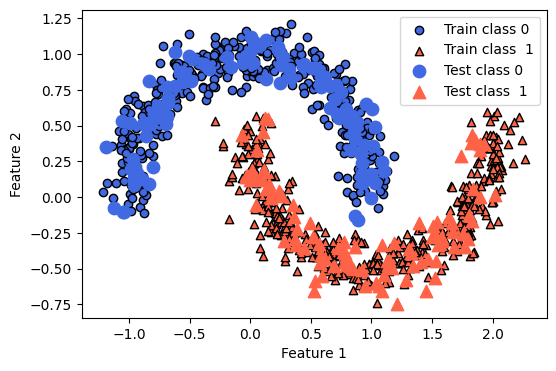

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
def generate_data(num):
    data, label = make_moons(n_samples=num, shuffle=True, noise=0.1, random_state=42)
    
    split_idx = int(num * 0.8)
    
    train_X = data[:split_idx]
    train_y = label[:split_idx].astype(int)
    
    test_X = data[split_idx:]
    test_y = label[split_idx:].astype(int)
    
    return train_X, train_y, test_X, test_y

X_train, y_train, X_test, y_test = generate_data(1000)
print("Training set shape:", X_train.shape, y_train.shape)
print("X_Train", X_train[:5])
print("y_Train", y_train[:5])
plt.figure(figsize=(6, 4))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            c='royalblue', marker='o', edgecolors='k', label='Train class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            c='tomato', marker='^', edgecolors='k', label='Train class  1')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1],
            c='royalblue', marker='o', facecolors='none', s=80  , label='Test class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            c='tomato', marker='^', facecolors='none', s=80  , label='Test class  1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import sys
print(sys.path)
from mlp_numpy import MLP as MLP_Numpy
from pytorch_mlp import MLP as MLP_PyTorch
from train_mlp_numpy import train_with_data_numpy as train_numpy
from pytorch_train_mlp import train_with_data_pytorch as train_pytorch
# 设定超参数
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 500
EVAL_FREQ_DEFAULT = 10
batch_size = 32
model_numpy = MLP_Numpy(n_inputs=2, n_hidden=[int(unit) for unit in DNN_HIDDEN_UNITS_DEFAULT.split(',')], n_classes=2)
model_pytorch = MLP_PyTorch(n_inputs=2, n_hidden=[int(unit) for unit in DNN_HIDDEN_UNITS_DEFAULT.split(',')], n_classes=2)

['d:\\anaconda3\\envs\\GPU\\python312.zip', 'd:\\anaconda3\\envs\\GPU\\DLLs', 'd:\\anaconda3\\envs\\GPU\\Lib', 'd:\\anaconda3\\envs\\GPU', '', 'd:\\anaconda3\\envs\\GPU\\Lib\\site-packages', 'd:\\anaconda3\\envs\\GPU\\Lib\\site-packages\\win32', 'd:\\anaconda3\\envs\\GPU\\Lib\\site-packages\\win32\\lib', 'd:\\anaconda3\\envs\\GPU\\Lib\\site-packages\\Pythonwin']


Training with NumPy:
Linear 2 20
ReLU
Linear 20 2
Starting training with Optimizer: SGD, Initial LR: 0.01, Max Epochs: 500
Epoch 10/500, Train Loss: 0.3320, Test Loss: 0.3476, Train Acc: 0.8725, Test Acc: 0.8500
Epoch 20/500, Train Loss: 0.2571, Test Loss: 0.2742, Train Acc: 0.8875, Test Acc: 0.9000
Epoch 30/500, Train Loss: 0.2216, Test Loss: 0.2397, Train Acc: 0.9062, Test Acc: 0.9200
Epoch 40/500, Train Loss: 0.1989, Test Loss: 0.2160, Train Acc: 0.9125, Test Acc: 0.9200
Epoch 50/500, Train Loss: 0.1850, Test Loss: 0.2015, Train Acc: 0.9163, Test Acc: 0.9200
Epoch 60/500, Train Loss: 0.1760, Test Loss: 0.1932, Train Acc: 0.9213, Test Acc: 0.9200
Epoch 70/500, Train Loss: 0.1684, Test Loss: 0.1852, Train Acc: 0.9237, Test Acc: 0.9250
Epoch 80/500, Train Loss: 0.1617, Test Loss: 0.1784, Train Acc: 0.9275, Test Acc: 0.9250
Epoch 90/500, Train Loss: 0.1556, Test Loss: 0.1721, Train Acc: 0.9300, Test Acc: 0.9300
Epoch 100/500, Train Loss: 0.1498, Test Loss: 0.1664, Train Acc: 0.9350, Tes

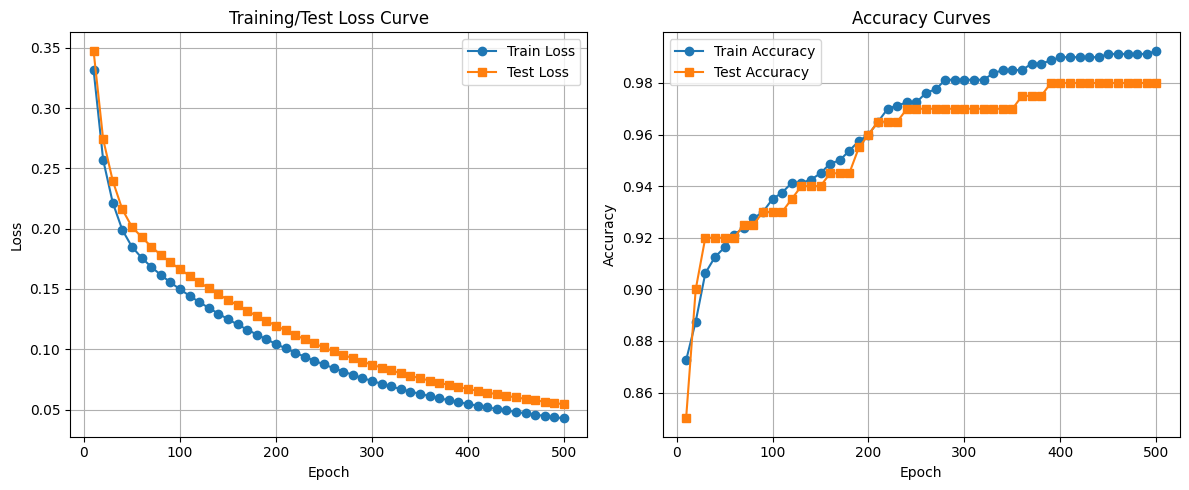

In [ ]:
# 使用NumPy训练模型
print("Training with NumPy:")
train_numpy(X_train, y_train, X_test, y_test, model_numpy,
            dnn_hidden_units=DNN_HIDDEN_UNITS_DEFAULT,
            learning_rate=LEARNING_RATE_DEFAULT,
            optimizer='sgd',
            max_steps=MAX_EPOCHS_DEFAULT,
            eval_freq=EVAL_FREQ_DEFAULT,
            batch_size=32)


Training with PyTorch:
Step 10/500 - batch_loss: 0.5578 - train_loss: 0.5233 - test_loss: 0.5238 - train_acc: 0.7775 - test_acc: 0.7550
Step 20/500 - batch_loss: 0.4205 - train_loss: 0.4505 - test_loss: 0.4543 - train_acc: 0.8212 - test_acc: 0.7950
Step 30/500 - batch_loss: 0.4924 - train_loss: 0.4038 - test_loss: 0.4111 - train_acc: 0.8287 - test_acc: 0.8000
Step 40/500 - batch_loss: 0.3843 - train_loss: 0.3687 - test_loss: 0.3783 - train_acc: 0.8363 - test_acc: 0.8150
Step 50/500 - batch_loss: 0.4069 - train_loss: 0.3453 - test_loss: 0.3551 - train_acc: 0.8438 - test_acc: 0.8300
Step 60/500 - batch_loss: 0.2504 - train_loss: 0.3267 - test_loss: 0.3396 - train_acc: 0.8425 - test_acc: 0.8350
Step 70/500 - batch_loss: 0.2886 - train_loss: 0.3116 - test_loss: 0.3239 - train_acc: 0.8500 - test_acc: 0.8400
Step 80/500 - batch_loss: 0.2850 - train_loss: 0.2978 - test_loss: 0.3111 - train_acc: 0.8525 - test_acc: 0.8450
Step 90/500 - batch_loss: 0.2509 - train_loss: 0.2886 - test_loss: 0.301

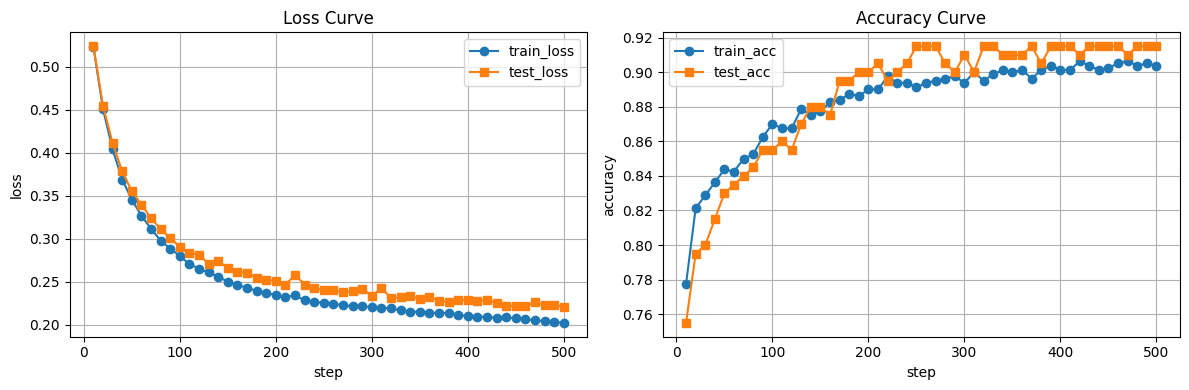

MLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [ ]:
# 使用PyTorch训练模型(默认使用sgd)
print("\nTraining with PyTorch:")
train_pytorch(X_train, y_train, X_test, y_test, model_pytorch,
            learning_rate=LEARNING_RATE_DEFAULT,
            max_steps=MAX_EPOCHS_DEFAULT,
            eval_freq=EVAL_FREQ_DEFAULT,
            batch_size=32)

## 1.3 Task 3

Using torchvision.datasets.CIFAR10 load the CIFAR10 dataset. Using PyTorch and the units, optimisation
methods, regularisation methods, etc., studied in these weeks, try to obtain the highest accuracy you can on this
dataset. Whenever possible use validation sets, but don’t worry too much about it at this stage. You’re free to
implement your architecture in a separate .py file, but you should use a jupyter notebook to run the experiments,
illustrate them, and comment on the results.

Using device: cuda

=== 检查模型初始化 ===
net.1.weight: mean=-0.0000, std=0.0221, max=0.0383
net.4.weight: mean=-0.0001, std=0.0313, max=0.0541
net.7.weight: mean=0.0000, std=0.0312, max=0.0541
net.10.weight: mean=-0.0000, std=0.0313, max=0.0541
net.13.weight: mean=0.0006, std=0.0437, max=0.0762



Epoch 1: avg_grad_norm=2.6856, lr=0.099994



Epoch 2: avg_grad_norm=1.9442, lr=0.099975



Epoch 3: avg_grad_norm=1.9336, lr=0.099944



Epoch 4: avg_grad_norm=1.9888, lr=0.099901



Epoch 5: avg_grad_norm=2.1553, lr=0.099846
Epoch 005 | train loss 2.1993 acc 0.1725 | test loss 2.2546 acc 0.1483



Epoch 10: avg_grad_norm=0.8964, lr=0.099384
Epoch 010 | train loss 2.2410 acc 0.1400 | test loss 2.1884 acc 0.1650



Epoch 15: avg_grad_norm=1.4185, lr=0.098618
Epoch 015 | train loss 2.2735 acc 0.1367 | test loss 2.2977 acc 0.1046



Epoch 20: avg_grad_norm=0.3174, lr=0.097553
Epoch 020 | train loss 2.2818 acc 0.1112 | test loss 2.3055 acc 0.1000



Epoch 25: avg_grad_norm=1.2361, lr=0.096194
Epoch 025 | train loss 2.2540 acc 0.1404 | test loss 2.3057 acc 0.1000



Epoch 30: avg_grad_norm=1.0658, lr=0.094550
Epoch 030 | train loss 2.2211 acc 0.1521 | test loss 2.1638 acc 0.1655



Epoch 35: avg_grad_norm=1.2919, lr=0.092632
Epoch 035 | train loss 2.2351 acc 0.1548 | test loss 2.2192 acc 0.1611



Epoch 40: avg_grad_norm=2.0561, lr=0.090451
Epoch 040 | train loss 2.3487 acc 0.1423 | test loss 2.2340 acc 0.1420



Epoch 45: avg_grad_norm=1.4427, lr=0.088020
Epoch 045 | train loss 2.3041 acc 0.1347 | test loss 2.2396 acc 0.1378



Epoch 50: avg_grad_norm=1.1023, lr=0.085355
Epoch 050 | train loss 2.2134 acc 0.1521 | test loss 2.2734 acc 0.1155



Epoch 55: avg_grad_norm=0.8741, lr=0.082472
Epoch 055 | train loss 2.2276 acc 0.1469 | test loss 2.2885 acc 0.1148



Epoch 60: avg_grad_norm=1.0533, lr=0.079389
Epoch 060 | train loss 2.2355 acc 0.1425 | test loss 2.2660 acc 0.1274



Epoch 65: avg_grad_norm=0.6050, lr=0.076125
Epoch 065 | train loss 2.2186 acc 0.1505 | test loss 2.1996 acc 0.1567



Epoch 70: avg_grad_norm=0.5662, lr=0.072700
Epoch 070 | train loss 2.2127 acc 0.1507 | test loss 2.2518 acc 0.1297



Epoch 75: avg_grad_norm=0.8110, lr=0.069134
Epoch 075 | train loss 2.2072 acc 0.1540 | test loss 2.2308 acc 0.1336



Epoch 80: avg_grad_norm=0.7715, lr=0.065451
Epoch 080 | train loss 2.2281 acc 0.1473 | test loss 2.1977 acc 0.1625



Epoch 85: avg_grad_norm=0.8924, lr=0.061672
Epoch 085 | train loss 2.1840 acc 0.1646 | test loss 2.1666 acc 0.1432



Epoch 90: avg_grad_norm=0.9420, lr=0.057822
Epoch 090 | train loss 2.1930 acc 0.1607 | test loss 2.1906 acc 0.1599



Epoch 95: avg_grad_norm=0.8738, lr=0.053923
Epoch 095 | train loss 2.1750 acc 0.1620 | test loss 2.1741 acc 0.1550



Epoch 100: avg_grad_norm=1.0592, lr=0.050000
Epoch 100 | train loss 2.1797 acc 0.1616 | test loss 2.1369 acc 0.1782



Epoch 105: avg_grad_norm=0.8025, lr=0.046077
Epoch 105 | train loss 2.1660 acc 0.1655 | test loss 2.1481 acc 0.1662



Epoch 110: avg_grad_norm=0.8637, lr=0.042178
Epoch 110 | train loss 2.1417 acc 0.1668 | test loss 2.1113 acc 0.1790



Epoch 115: avg_grad_norm=1.2313, lr=0.038328
Epoch 115 | train loss 2.0532 acc 0.2124 | test loss 1.9170 acc 0.2763



Epoch 120: avg_grad_norm=1.5599, lr=0.034549
Epoch 120 | train loss 1.8529 acc 0.3093 | test loss 1.7583 acc 0.3708



Epoch 125: avg_grad_norm=1.9643, lr=0.030866
Epoch 125 | train loss 1.7337 acc 0.3757 | test loss 1.6301 acc 0.4314



Epoch 130: avg_grad_norm=2.1269, lr=0.027300
Epoch 130 | train loss 1.6579 acc 0.4141 | test loss 1.6006 acc 0.4487



Epoch 135: avg_grad_norm=2.2198, lr=0.023875
Epoch 135 | train loss 1.5753 acc 0.4404 | test loss 1.5134 acc 0.4768



Epoch 140: avg_grad_norm=2.3092, lr=0.020611
Epoch 140 | train loss 1.5067 acc 0.4700 | test loss 1.4657 acc 0.4917



Epoch 145: avg_grad_norm=2.4079, lr=0.017528
Epoch 145 | train loss 1.4491 acc 0.4893 | test loss 1.4144 acc 0.5120



Epoch 150: avg_grad_norm=2.5250, lr=0.014645
Epoch 150 | train loss 1.3855 acc 0.5140 | test loss 1.3986 acc 0.5114



Epoch 155: avg_grad_norm=2.6309, lr=0.011980
Epoch 155 | train loss 1.3248 acc 0.5357 | test loss 1.3592 acc 0.5280



Epoch 160: avg_grad_norm=2.8090, lr=0.009549
Epoch 160 | train loss 1.2641 acc 0.5559 | test loss 1.3350 acc 0.5353



Epoch 165: avg_grad_norm=2.9988, lr=0.007368
Epoch 165 | train loss 1.2060 acc 0.5767 | test loss 1.3196 acc 0.5346



Epoch 170: avg_grad_norm=3.2064, lr=0.005450
Epoch 170 | train loss 1.1550 acc 0.5933 | test loss 1.3033 acc 0.5415



Epoch 175: avg_grad_norm=3.4431, lr=0.003806
Epoch 175 | train loss 1.0880 acc 0.6196 | test loss 1.2972 acc 0.5467



Epoch 180: avg_grad_norm=3.6965, lr=0.002447
Epoch 180 | train loss 1.0354 acc 0.6374 | test loss 1.2755 acc 0.5558



Epoch 185: avg_grad_norm=3.9059, lr=0.001382
Epoch 185 | train loss 0.9812 acc 0.6576 | test loss 1.2639 acc 0.5638



Epoch 190: avg_grad_norm=4.0622, lr=0.000616
Epoch 190 | train loss 0.9350 acc 0.6712 | test loss 1.2659 acc 0.5638



Epoch 195: avg_grad_norm=4.1688, lr=0.000154
Epoch 195 | train loss 0.9162 acc 0.6787 | test loss 1.2623 acc 0.5629



Epoch 200: avg_grad_norm=4.1320, lr=0.000000
Epoch 200 | train loss 0.9062 acc 0.6827 | test loss 1.2637 acc 0.5643


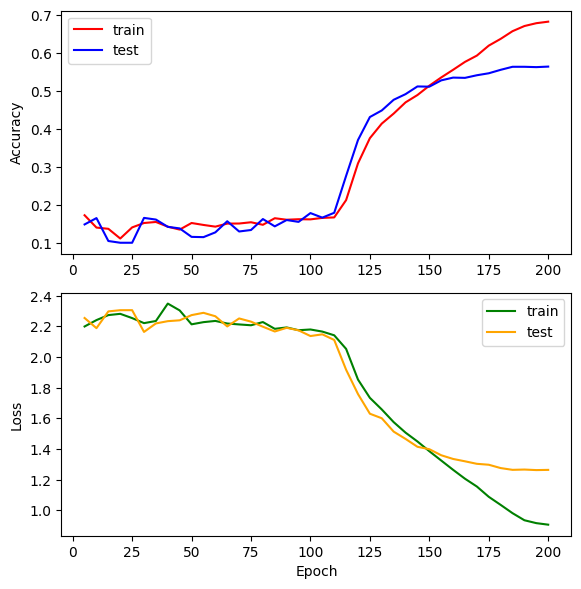

In [1]:
from cifar10_mlp import train_mlp

model, curves = train_mlp(hidden_nodes=1024,
                          dropout=0.5,
                          n_layers=4,
                          lr=0.1,
                          batch_size=128,
                          epochs=200,
                          optimizer='SGD',
                          eval_freq=5)
# 训练结束自动出图，curves 里带回 4 条曲线数据